In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
files.upload()

Saving zahn.dat to zahn (1).dat


{'zahn.dat': b'26.75\t22.15\n29.8\t22.15\n31.55\t21.1\n27.7\t20.85\n29.9\t19.95\n26.8\t19.05\n28.35\t18.25\n30.4\t17.85\n27.25\t16.7\n29.05\t16\n27.15\t14.85\n28.2\t13.95\n30.35\t13.85\n27.25\t11.95\n29.45\t12.05\n31.55\t12.2\n33.05\t10.65\n29.95\t9.85\n28\t9.75\n27.15\t7.85\n29.15\t8.1\n31.95\t8.6\n34.7\t8.55\n34.8\t12.25\n36.3\t15.25\n36.6\t13.2\n38.7\t14.25\n40.3\t15.5\n42.25\t14.25\n40.7\t12.8\n38.6\t12.1\n36.1\t10.5\n38.35\t10.4\n37.65\t8.4\n40.15\t8.55\n40.8\t10.65\n42.9\t11.25\n41.95\t8.5\n42.45\t17.45\n40.25\t18.45\n42.55\t19.45\n40.95\t20.65\n42.25\t22.15\n38.85\t22.4\n38.4\t20\n35.25\t20.2\n33.25\t21\n34.15\t22.35\n35.55\t22.5\n36.55\t21.4\n33.35\t19.6\n32.85\t19.55\n32.4\t19.15\n32.45\t18.7\n32.8\t18.9\n33.2\t19.2\n33.7\t19.05\n33.4\t18.75\n33.05\t18.5\n32.8\t18.2\n34\t18.7\n33.85\t18.25\n33.35\t18.15\n32.8\t17.7\n33.15\t17.55\n33.75\t17.75\n34.15\t17.85\n34.35\t18.35\n34.95\t18.5\n34.75\t18.05\n35.15\t18.05\n35.65\t18.15\n35.45\t18.7\n36.05\t18.75\n36.25\t18.2\n36.6\t18.7\n

         0      1
0    26.75  22.15
1    29.80  22.15
2    31.55  21.10
3    27.70  20.85
4    29.90  19.95
..     ...    ...
394  15.85   9.95
395  15.35   9.90
396  15.60   9.45
397  15.30   9.15
398  15.10   9.55

[399 rows x 2 columns]


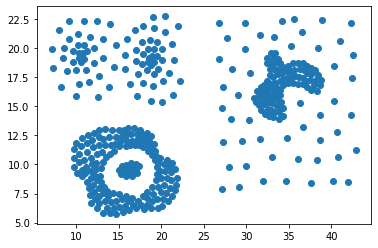

In [ ]:
df = pd.read_table("zahn.dat", header=None, sep="\s+")
print (df)
zahn_dist = df.to_numpy()
plt.scatter(zahn_dist[:,0], zahn_dist[:,1])

In [ ]:
import numpy as np
def distance(x2,x1,y2,y1,n_dis = "e"):
  """ Función para encontrar las distancias entre dos puntos
  "e" - Euclideana
  "m" - Manhattan
  "c" - Canberra """
  if n_dis == "e": #EUCLIDEANA
    distancia = ((x2-x1)**2 + (y2-y1)**2)**(1/2)
    return distancia
  if n_dis == "m": #MANHATTAN
    distancia = abs(x2-x1) + abs(y2-y1)
    return distancia
  if n_dis == "c": #CANBERRA
    distancia = (abs(x2-x1)+abs(y2-y1))/(abs(x2)+abs(x1)+abs(y2)+abs(y1))
    return distancia 

def distancia_maxima(dist_name = "e"):
  """ Función para obtener la distancia máxima entre dos puntos 
  "e" - Euclideana
  "m" - Manhattan
  "c" - Canberra """
  lista_dis = []
  for i in range(len(zahn_dist[:,0])):
    x2 = zahn_dist[i,0]
    y2 = zahn_dist[i,1]
    for j in range(i+1, len(zahn_dist[:,0])):
      dis = distance(x2,zahn_dist[j,0], y2, zahn_dist[j,1],dist_name)
      lista_dis.append(dis)
  return (np.max(lista_dis))      

In [ ]:
print("Distancia máxima euclideana ", distancia_maxima("e"))
print("\nDistancia máxima manhattan ", distancia_maxima("m"))
print("\nDistancia máxima canberra ", distancia_maxima("c"))

Distancia máxima euclideana  36.781585066443235

Distancia máxima manhattan  46.95

Distancia máxima canberra  0.5961290322580646


In [ ]:
def inciso_4(lista_hiper,lista_promedios):
  """ Función para generar lista para inciso 4 de la tarea: 
  S = Distancia esperada / Densidad del vector para una esfera de radio r
  El radio r = lista_hiper_2,3,5 o 10"""
  lista_x = []
  for k in range(len(lista_promedios)):
    lista_x.append(lista_promedios[k]/lista_hiper[k])
  return lista_x

def tarea_zahn(dist_name,inciso):
  """ Función principal de tarea.
  Utilizando las distancias para dist_name 
  "e" - Euclideana
  "m" - Manhattan
  "c" - Canberra
  
  Se realizará lo siguiente:

  Inciso 1: Distancia esperada para cada vector al resto de los vectores.
  Inciso 2: Densidad de cada vector: Número de vecinos en una hiperesfera de radio R = DIAM(Z)/[2,3,5,10]
  Inciso 3: Graficar Zahn, codificando E(v) y D(v)
  Inciso 4: Graficar Zahn, codificando S = E(v)/D(v,R)

  """
  dis_max = distancia_maxima(dist_name)

  lista_hiper_2 = []
  lista_hiper_3 = []
  lista_hiper_5 = []
  lista_hiper_10 = []
  lista_promedios = []

  for i in range(len(zahn_dist[:,0])):
    list_2 = []
    list_3 = []
    list_5 = []
    list_10 = []
    list_p = []
    x2 = zahn_dist[i,0]
    y2 = zahn_dist[i,1]
    for j in range(len(zahn_dist[:,0])):
      dis = distance(x2,zahn_dist[j,0], y2, zahn_dist[j,1],dist_name)
      if dis != 0:
        list_p.append(dis)
      if dis < (dis_max/2) and dis != 0:
        list_2.append(dis)
      if dis < (dis_max/3) and dis != 0:
        list_3.append(dis)
      if dis < (dis_max/5) and dis != 0:
        list_5.append(dis)
      if dis < (dis_max/10) and dis != 0:
        list_10.append(dis)
    lista_hiper_2.append(len(list_2))
    lista_hiper_3.append(len(list_3))
    lista_hiper_5.append(len(list_5))
    lista_hiper_10.append(len(list_10))
    lista_promedios.append(np.mean(list_p))
  fig, ax = plt.subplots(figsize=(10,8))
  col = ['hiper 2','hiper 3','hiper 5','hiper 10']
  if inciso == 1:
    ax.scatter(list(range(0, len(lista_promedios))), lista_promedios, color = 'm',label = "Valores Esperados")
    
  if inciso == 2:
    ax.scatter(list(range(0, len(lista_hiper_2))),lista_hiper_2, color = 'b', label = col[0])
    ax.scatter(list(range(0, len(lista_hiper_3))),lista_hiper_3, color='r',label = col[1])
    ax.scatter(list(range(0, len(lista_hiper_5))),lista_hiper_5, color='y', label = col[2])
    ax.scatter(list(range(0, len(lista_hiper_10))),lista_hiper_10, color = 'c', label = col[3])
    
  if inciso == 3:
    plt.scatter(lista_promedios,lista_hiper_2, color = 'b',label = col[0])
    plt.scatter(lista_promedios,lista_hiper_3, color='r',label = col[1])
    plt.scatter(lista_promedios,lista_hiper_5, color='y',label = col[2])
    plt.scatter(lista_promedios,lista_hiper_10, color = 'c',label = col[3])

  if inciso == 4:
    plt.scatter(list(range(0, len(lista_hiper_2))),inciso_4(lista_hiper_2, lista_promedios), color = 'b',label = col[0])
    plt.scatter(list(range(0, len(lista_hiper_3))),inciso_4(lista_hiper_3,lista_promedios), color = 'r',label = col[1])
    plt.scatter(list(range(0, len(lista_hiper_5))),inciso_4(lista_hiper_5,lista_promedios), color = 'y',label = col[2])
    plt.scatter(list(range(0, len(lista_hiper_10))),inciso_4(lista_hiper_10,lista_promedios), color = 'c',label = col[3])

  ax.legend(loc='upper right',bbox_to_anchor=(1, 1))
  fig = plt.show()
  return fig


In [ ]:
def imprimir_resultados(dist_name, inciso=0): 
  if dist_name == "e":
    print("\n----------------------------------------Euclideana----------------------------------------")
  if dist_name == "m":
    print("\n----------------------------------------Manhattan----------------------------------------")
  if dist_name == "c":
    print("\n----------------------------------------Canberra----------------------------------------")
  if inciso == 0:
    print("\nInciso 1")
    tarea_zahn(dist_name, 1)
    print("\nInciso 2")
    tarea_zahn(dist_name, 2)
    print("Inciso 3")
    tarea_zahn(dist_name, 3)
    print("Inciso 4")
    tarea_zahn(dist_name, 4)
  if inciso == 1:
    print("\nInciso 1")
    tarea_zahn(dist_name, 1)
  if inciso == 2:
    print("\nInciso 2")
    tarea_zahn(dist_name, 2)
  if inciso == 3:
    print("Inciso 3")
    tarea_zahn(dist_name, 3)
  if inciso == 4:
    print("Inciso 4")
    tarea_zahn(dist_name, 4)


----------------------------------------Euclideana----------------------------------------

Inciso 1


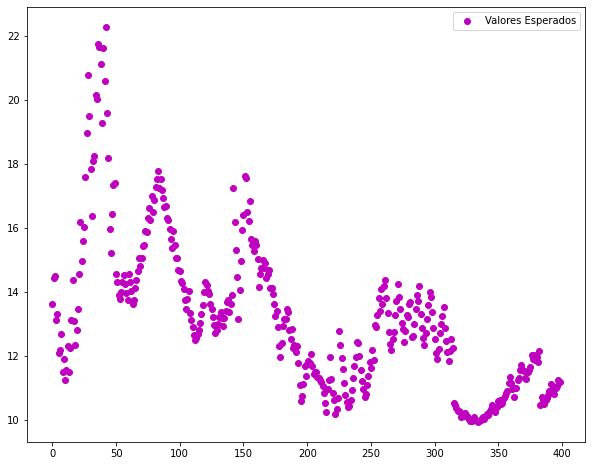


----------------------------------------Manhattan----------------------------------------

Inciso 1


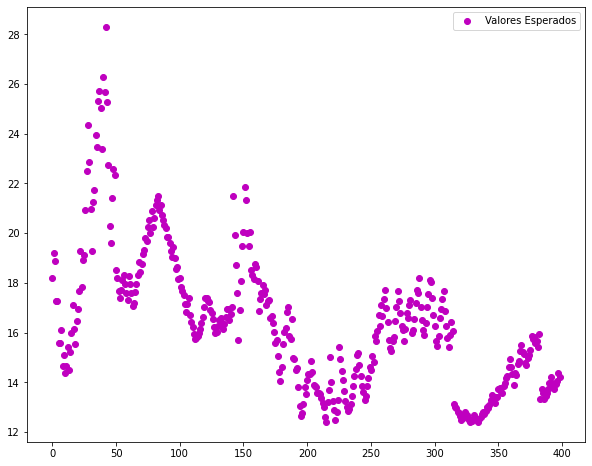


----------------------------------------Canberra----------------------------------------

Inciso 1


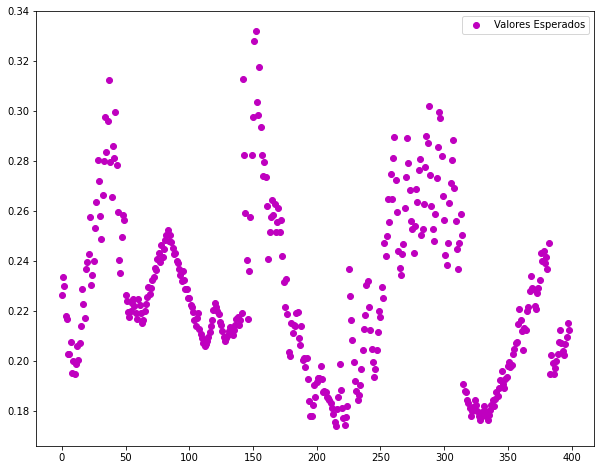

In [ ]:
inciso_comparar = 1
imprimir_resultados("e",inciso_comparar)
imprimir_resultados("m",inciso_comparar)
imprimir_resultados("c",inciso_comparar)


----------------------------------------Euclideana----------------------------------------

Inciso 2


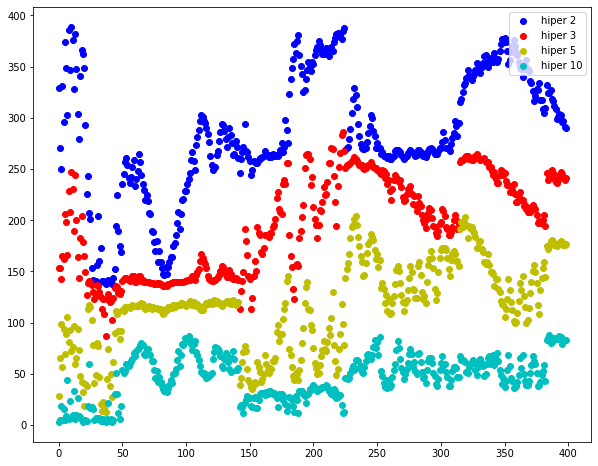


----------------------------------------Manhattan----------------------------------------

Inciso 2


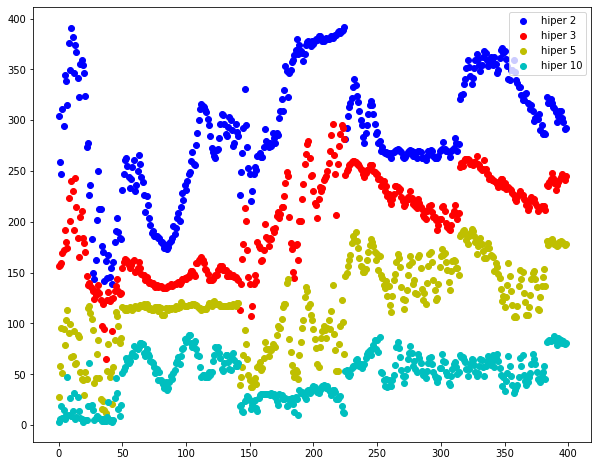


----------------------------------------Canberra----------------------------------------

Inciso 2


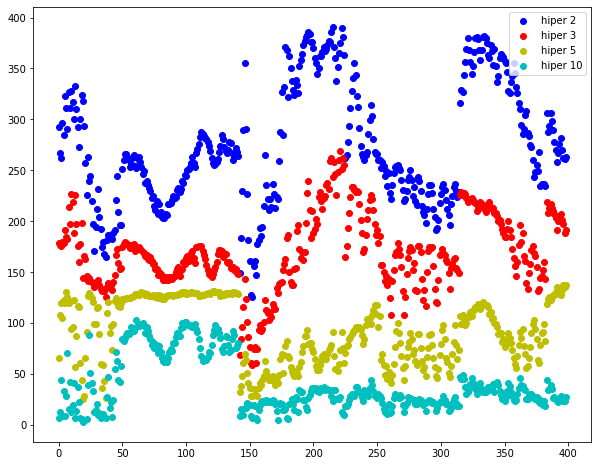

In [ ]:
inciso_comparar = 2
imprimir_resultados("e",inciso_comparar)
imprimir_resultados("m",inciso_comparar)
imprimir_resultados("c",inciso_comparar)


----------------------------------------Euclideana----------------------------------------
Inciso 3


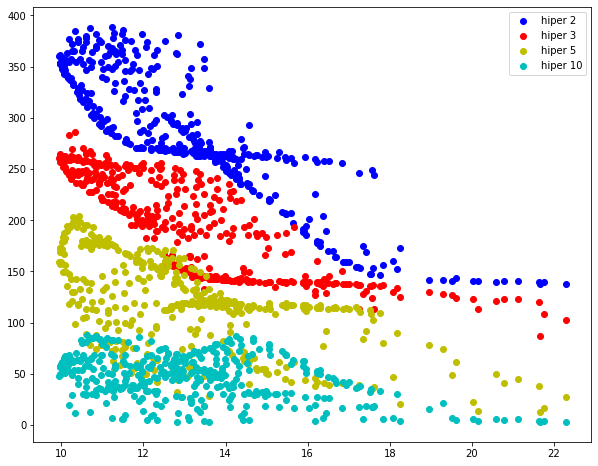


----------------------------------------Manhattan----------------------------------------
Inciso 3


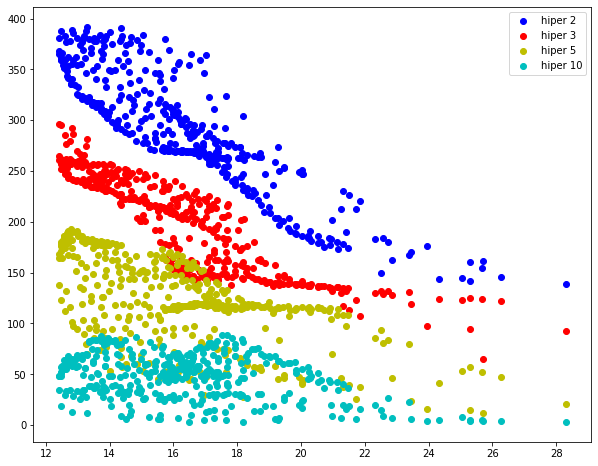


----------------------------------------Canberra----------------------------------------
Inciso 3


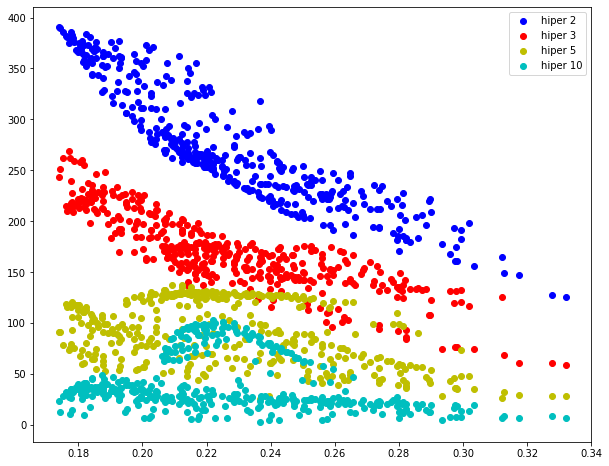

In [ ]:
inciso_comparar = 3
imprimir_resultados("e",inciso_comparar)
imprimir_resultados("m",inciso_comparar)
imprimir_resultados("c",inciso_comparar)


----------------------------------------Euclideana----------------------------------------
Inciso 4


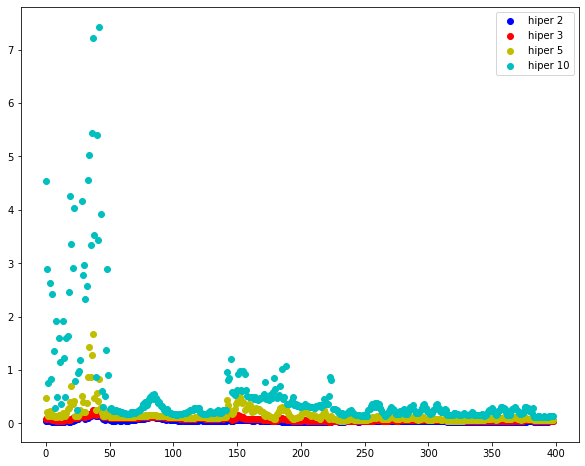


----------------------------------------Manhattan----------------------------------------
Inciso 4


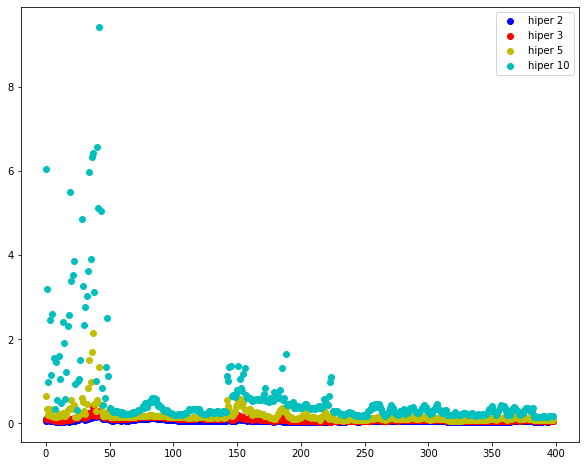


----------------------------------------Canberra----------------------------------------
Inciso 4


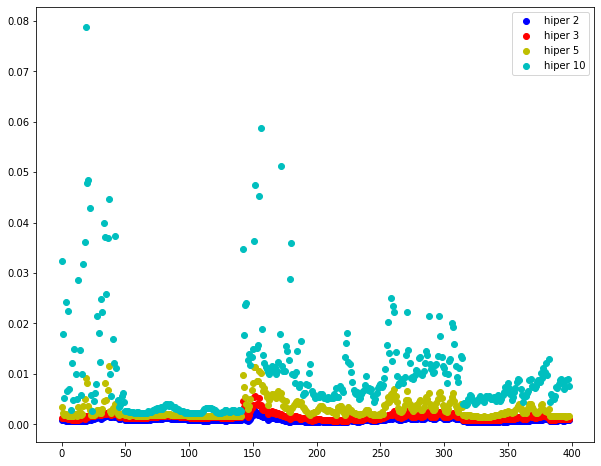

In [ ]:
inciso_comparar = 4
imprimir_resultados("e",inciso_comparar)
imprimir_resultados("m",inciso_comparar)
imprimir_resultados("c",inciso_comparar)